In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("question_3_4_5_pokemon_rankings_train.csv")
test = pd.read_csv("question_3_4_5_pokemon_rankings_test.csv")
mctr = train.columns[train.isnull().any()]
mcte = test.columns[test.isnull().any()]
print('Columns with missing values:', mctr)
print('Columns with missing values:', mcte)

col = ['famous_artist', 'photo_brightness_level', 'photo_depth_of_field ',
       'is_pokemon_larger_than_a_burrito',
       'cute_classification_conv_net_feature_14',
       'cute_classification_conv_net_feature_26', 'photo_night_or_day']
train[col] = train[col].apply(lambda x: x.astype("category").cat.codes)
test[col] = test[col].apply(lambda x: x.astype("category").cat.codes)

Columns with missing values: Index([], dtype='object')
Columns with missing values: Index([], dtype='object')


In [3]:
X_train = train.drop(columns=['pokemon_names', 'poke_tiers', 'raw_rankings'], axis=1)
y_train = train['raw_rankings']
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

X_test = test.drop(columns=['pokemon_names', 'poke_tiers', 'raw_rankings'], axis=1)
y_test = test['raw_rankings']
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE (Ridge):', mse, '\n')

MSE (Ridge): 1.006475896152878 



In [4]:
mapping = {'C': 1, 'B': 2, 'A': 3, 'S': 4}
train['poke_tiers'] = train['poke_tiers'].map(mapping)
test['poke_tiers'] = test['poke_tiers'].map(mapping)

X_train = train.drop(columns=['pokemon_names', 'poke_tiers', 'raw_rankings'], axis=1)
y_train = train['poke_tiers']
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

X_test = test.drop(columns=['pokemon_names', 'poke_tiers', 'raw_rankings'], axis=1)
y_test = test['poke_tiers']
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Test Set Accuracy:', accuracy)

Test Set Accuracy: 0.34833333333333333


In [5]:
y_pred = rfc.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE (Random forest classifier):', mse)

MSE (Random forest classifier): 1.5266666666666666


In [6]:
feature_importances = rfc.feature_importances_

for feature_name, importance in zip(X_train.columns, feature_importances):
    print(f"{feature_name}: {importance}")

famous_artist: 0.16375420882037475
photo_brightness_level: 0.08848331758489916
photo_depth_of_field : 0.08584431887007402
is_pokemon_larger_than_a_burrito: 0.05893457766669773
cute_classification_conv_net_feature_14: 0.07893712968944247
cute_classification_conv_net_feature_26: 0.438576925541536
photo_night_or_day: 0.08546952182697591


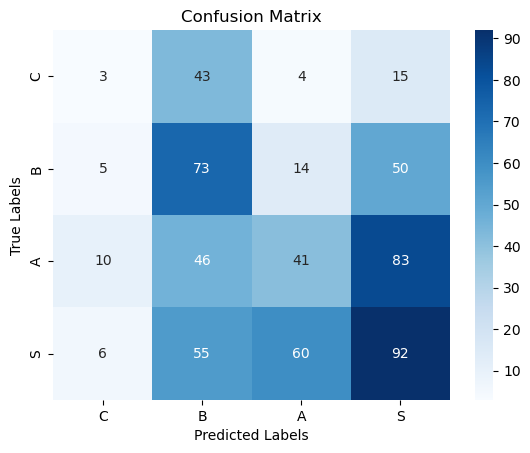

In [7]:
cm = confusion_matrix(y_test, y_pred)
labels = ['C', 'B', 'A', 'S']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()